# **DECISION TREE AND RANDOM FOREST ON IRIS DATASET**

### **1. Import Statements and Loading Dataset**

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

In [2]:
# Read the dataset and print a few samples
df = pd.read_csv('D:\Programming\Machine_Learning\Datasets\Iris\Iris.csv')
df.sample(5)

<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\chira\AppData\Local\Temp\ipykernel_5724\1355624665.py:2: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv('D:\Programming\Machine_Learning\Datasets\Iris\Iris.csv')


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
5,6,5.4,3.9,1.7,0.4,Iris-setosa
99,100,5.7,2.8,4.1,1.3,Iris-versicolor
40,41,5.0,3.5,1.3,0.3,Iris-setosa
104,105,6.5,3.0,5.8,2.2,Iris-virginica
114,115,5.8,2.8,5.1,2.4,Iris-virginica


In [3]:
# Describe the dataset
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### **2. Preparing the dataset**

In [4]:
# Get the features and target/label columns
X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = df.Species

In [5]:
# Split the data into train and test
X_train, X_val, y_train, y_val = train_test_split(X,y)

### **3. Model Initialization, Training Data and Making Predictions**

#### **3.1. Decision Tree Classifier**

In [6]:
dt_model = DecisionTreeClassifier(random_state = 42) # Initialize a Decision Tree Classifier with fixed random state for reproducibility
dt_model.fit(X_train,y_train) # Train the decision tree model on the training data
y_pred_dt = dt_model.predict(X_val) # Use the trained model to make predictions on validation data

#### **3.2. Random Forest Classifier**

In [7]:
rf_model = RandomForestClassifier(random_state = 42) # Initialize a Random Forest Classifier with fixed random state for reproducibility
rf_model.fit(X_train,y_train) # Train the Random Forest model on the training data
y_pred_rf = rf_model.predict(X_val) # Use the trained model to make predictions on validation data

### **4. Model Validation**

#### **4.1. Accuracy Score**

In [8]:
print(accuracy_score(y_val, y_pred_dt))
print(accuracy_score(y_val, y_pred_rf))

0.9473684210526315
0.9473684210526315


#### **4.2. Confusion Matrix**

In [9]:
cm_dt = confusion_matrix(y_val, y_pred_dt)  # Decision Tree
cm_rf = confusion_matrix(y_val, y_pred_rf)  # Random Forest

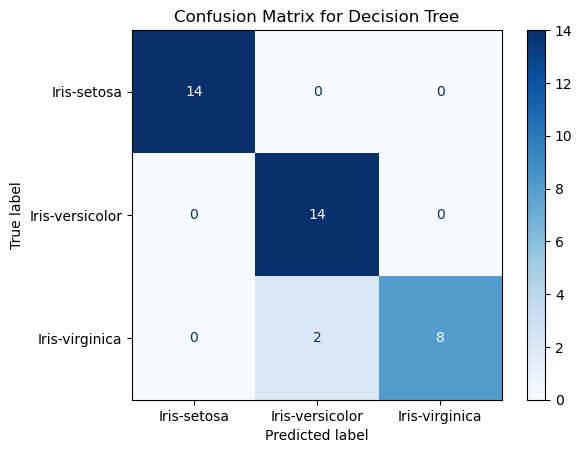

In [10]:
# Decison Tree Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=np.unique(df['Species']))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for Decision Tree")
plt.show()

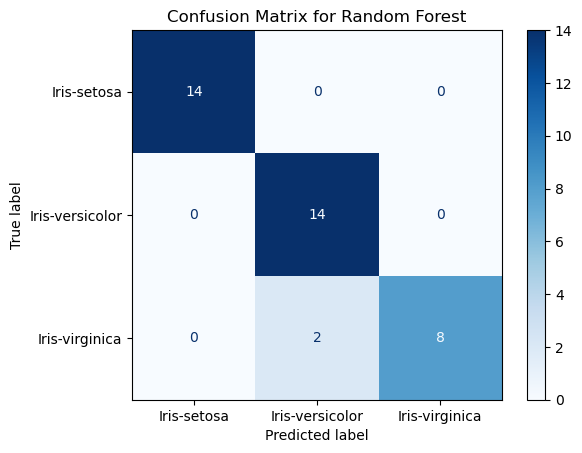

In [11]:
# Random Forest Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=np.unique(df['Species']))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for Random Forest")
plt.show()

#### **4.3. Cross Validation Score**

In [12]:
print(cross_val_score(dt_model, X_train, y_train, cv=5).mean())
print(cross_val_score(rf_model, X_train, y_train, cv=5).mean())

0.9553359683794467
0.9644268774703558


### **5. Prediction using new data (User given)**

In [13]:
# Make predicition using Decision Tree for new flower
new_flower = pd.DataFrame([[4,2,1,6]],columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
new_flower_pred = dt_model.predict(new_flower)
print(new_flower_pred[0])

Iris-setosa


In [14]:
# Make predicition using Random Forest for new flower
new_flower = pd.DataFrame([[4,2,1,6]],columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
new_flower_pred = rf_model.predict(new_flower)
print(new_flower_pred[0])

Iris-setosa


In [17]:
import pickle
with open('dt_model.pkl','wb') as f:
    pickle.dump(dt_model,f)
with open('rf_model.pkl','wb') as f:
    pickle.dump(rf_model,f)
    

In [18]:
with open('dt_model.pkl','rb') as f:
    dt_model_load = pickle.load(f)
with open('rf_model.pkl','rb') as f:
    rf_model_load = pickle.load(f)
new_flower = pd.DataFrame([[4,2,1,6]],columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
new_flower_pred = dt_model_load.predict(new_flower) 
print(new_flower_pred[0])  # Output the prediction for Decision Tree
new_flower_pred = rf_model_load.predict(new_flower)
print(new_flower_pred[0])  # Output the prediction for Random Forest

Iris-setosa
Iris-setosa
